In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import mapping
import shapely.speedups # can help speed up processes
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point
#from matplotlib.pyplot import figure
import timeit
# change default figsize
plt.rcParams['figure.figsize'] = (15, 15)


In [2]:
# #  read files domiciled remotely

# cooling_centers_raw = gpd.read_file('C:/Users/NEWMAPSPLUS2/brainstorm-final-project-698/raw_data/Cooling_Centers_-_District_of_Columbia.geojson')
# cooling_centers_raw.to_file('raw_data/cooling_centers.json')


In [3]:
#  read files domiciled remotely

census_tracts_raw = gpd.read_file('C:/Users/NEWMAPSPLUS2/brainstorm-final-project-698/raw_data/Census_Tracts_in_2020.geojson')
census_tracts_raw.to_file('raw_data/dc_census_tracts.json')


heat_sensitivity_raw = gpd.read_file('C:/Users/NEWMAPSPLUS2/brainstorm-final-project-698/raw_data/Heat_Sensitivity_Exposure_Index.geojson')
heat_sensitivity_raw.to_file('raw_data/heat_sensitivity.json')

cooling_centers_raw = gpd.read_file('C:/Users/NEWMAPSPLUS2/brainstorm-final-project-698/raw_data/Cooling_Centers_-_District_of_Columbia.geojson')
cooling_centers_raw.to_file('raw_data/cooling_centers.json')



<AxesSubplot: >

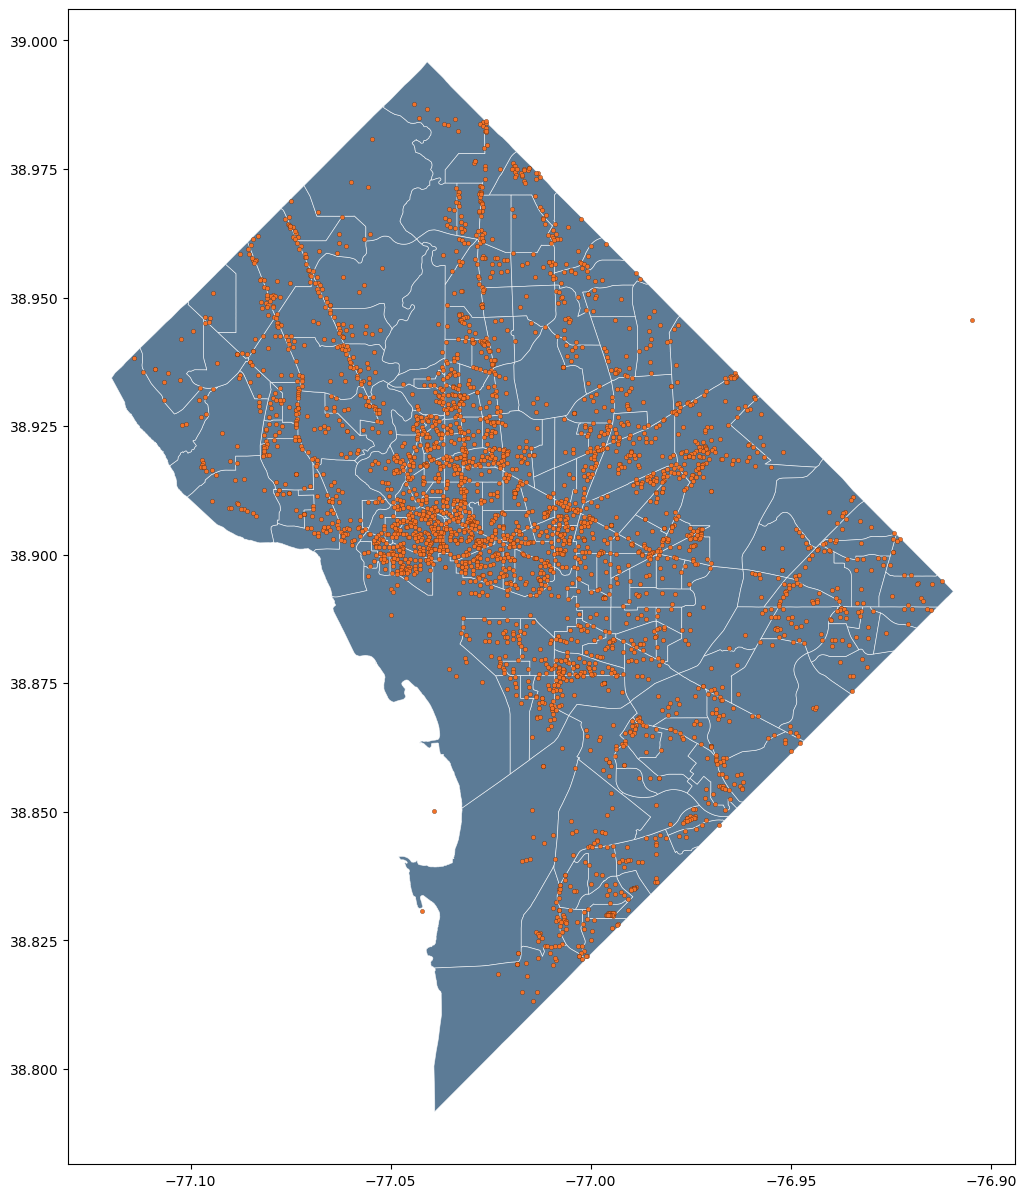

In [23]:
# convert raw data to data frame for visualisation 
# data frame showing all underground storage tanks in DC area overlaid on census tracts (2020)

census_tracts_df = gpd.read_file('raw_data/dc_census_tracts.json')
storage_tanks_df = gpd.read_file('raw_data/storage_tanks_all.geojson')



fig, ax = plt.subplots()
census_tracts_df.plot(ax=ax, color='#264F73', zorder=1, linewidth=.5, alpha=.75, edgecolor='white')
storage_tanks_df.plot(ax=ax, color='#F27127', zorder=2, linewidth=.15, markersize=10, alpha=1, edgecolor='black')



In [5]:
# examine the raw data for the joined dataset ( economics and census tracts)
economics_raw = gpd.read_file('raw_data/joined_data.geojson')
economics_raw.head()

,OBJECTID,TRACT,GEOID,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,...,economics_bm_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families,economics_bm_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Married couple families,economics_bm_Name,"economics_bm_PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Female householder, no spouse present","economics_bm_PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Female householder, no spouse present: With related children of the householder under 18 years",economics_bm_PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people,economics_bm_PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: People in families,economics_bm_x,economics_bm_y,geometry
0,1,002002,11001002002,4072,3647,1116,1751,27,84,0,...,2.3,1.0,"Census Tract 20.02, District of Columbia",7.4,14.2,6.0,3.3,None,None,"POLYGON ((-77.03642 38.94975, -77.03643 38.948..."
1,2,002101,11001002101,5687,5071,1037,2642,86,120,1,...,6.1,6.5,"Census Tract 21.01, District of Columbia",7.5,3.4,7.7,5.4,None,None,"POLYGON ((-77.02824 38.95813, -77.02824 38.958..."
2,3,002102,11001002102,5099,4599,901,2910,50,87,0,...,12.2,10.3,"Census Tract 21.02, District of Columbia",12.4,38.9,12.7,11.7,None,None,"POLYGON ((-77.01997 38.95819, -77.01997 38.958..."
3,4,002201,11001002201,3485,3138,973,1722,21,94,2,...,5.4,6.7,"Census Tract 22.01, District of Columbia",0.0,0.0,9.3,9.0,None,None,"POLYGON ((-77.02743 38.95188, -77.02740 38.951..."
4,5,002202,11001002202,3339,2957,619,1636,48,57,3,...,8.5,0.0,"Census Tract 22.02, District of Columbia",24.8,39.7,13.3,13.4,None,None,"POLYGON ((-77.01968 38.95209, -77.01963 38.951..."


<AxesSubplot: >

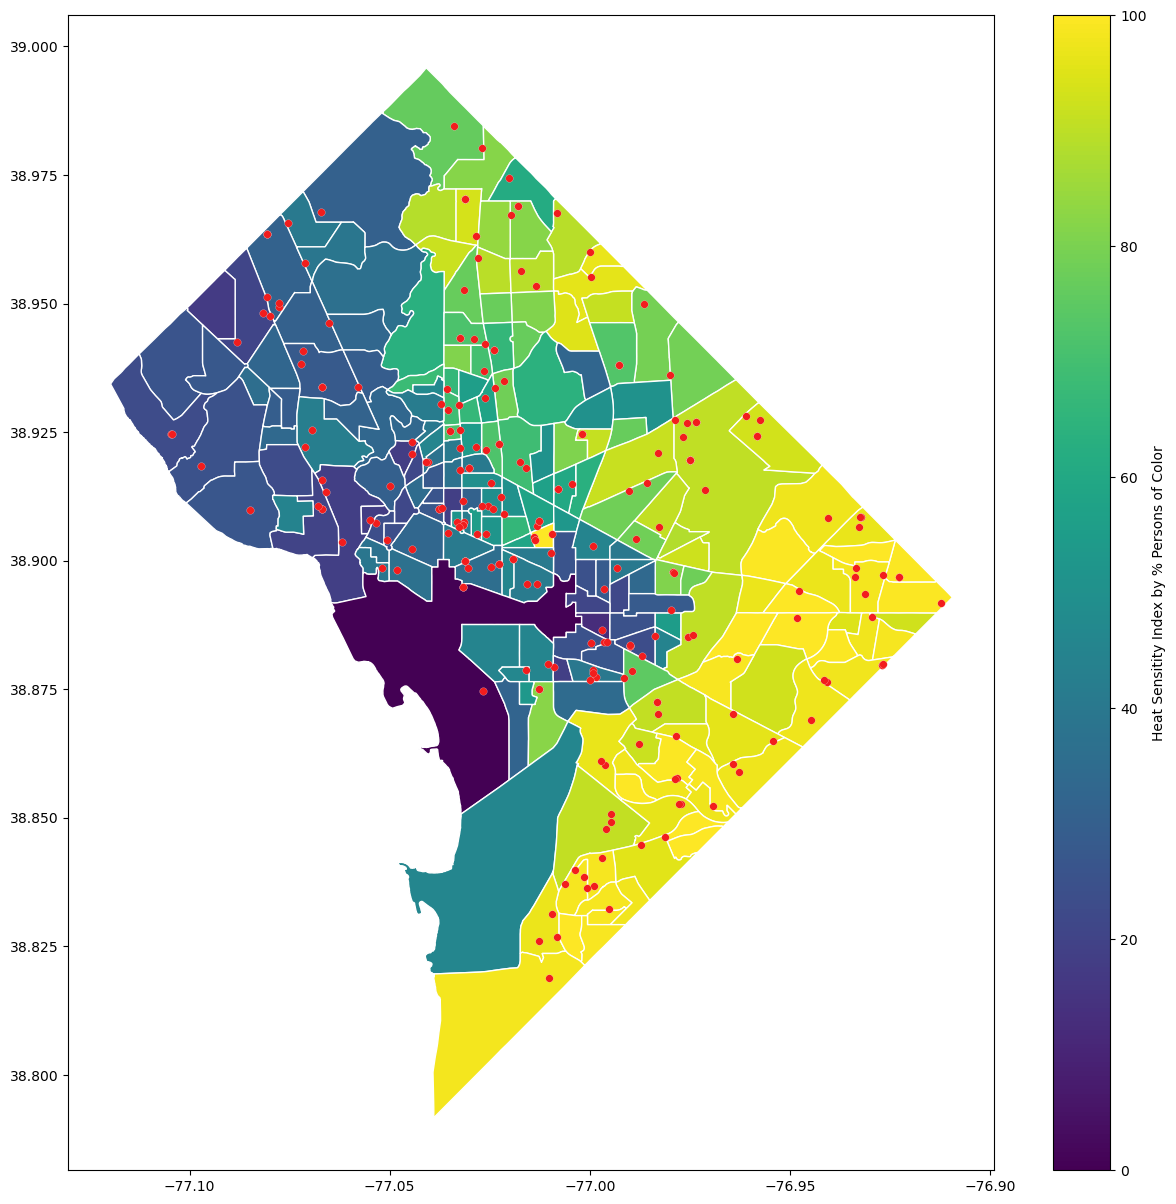

In [34]:
# plot heat sensitivity index by persons of color percentage
# overlay cooling centers


heat_sensitivity = gpd.read_file('raw_data/heat_sensitivity.json')
cooling_centers_df =gpd.read_file('raw_data/cooling_centers.json')

fig, ax = plt.subplots()
#census_tracts_df.plot(ax=ax, zorder=2, linewidth=1.5, alpha=.5, color='red', edgecolor='white')

heat_sensitivity.plot(ax=ax, 
                   column = 'P_POC', 
                      legend = True,
                  figsize = [25, 25],\
                  legend_kwds = {'label': "Heat Sensitity Index by % Persons of Color"}, 
                  zorder=3, 
                  alpha=1, 
                  linewidth=1, 
                  edgecolor='white')
cooling_centers_df.plot(ax=ax, color='#F21D1D', zorder=3, linewidth=.15, markersize=30, alpha=1, edgecolor='white')

                      
          

<AxesSubplot: >

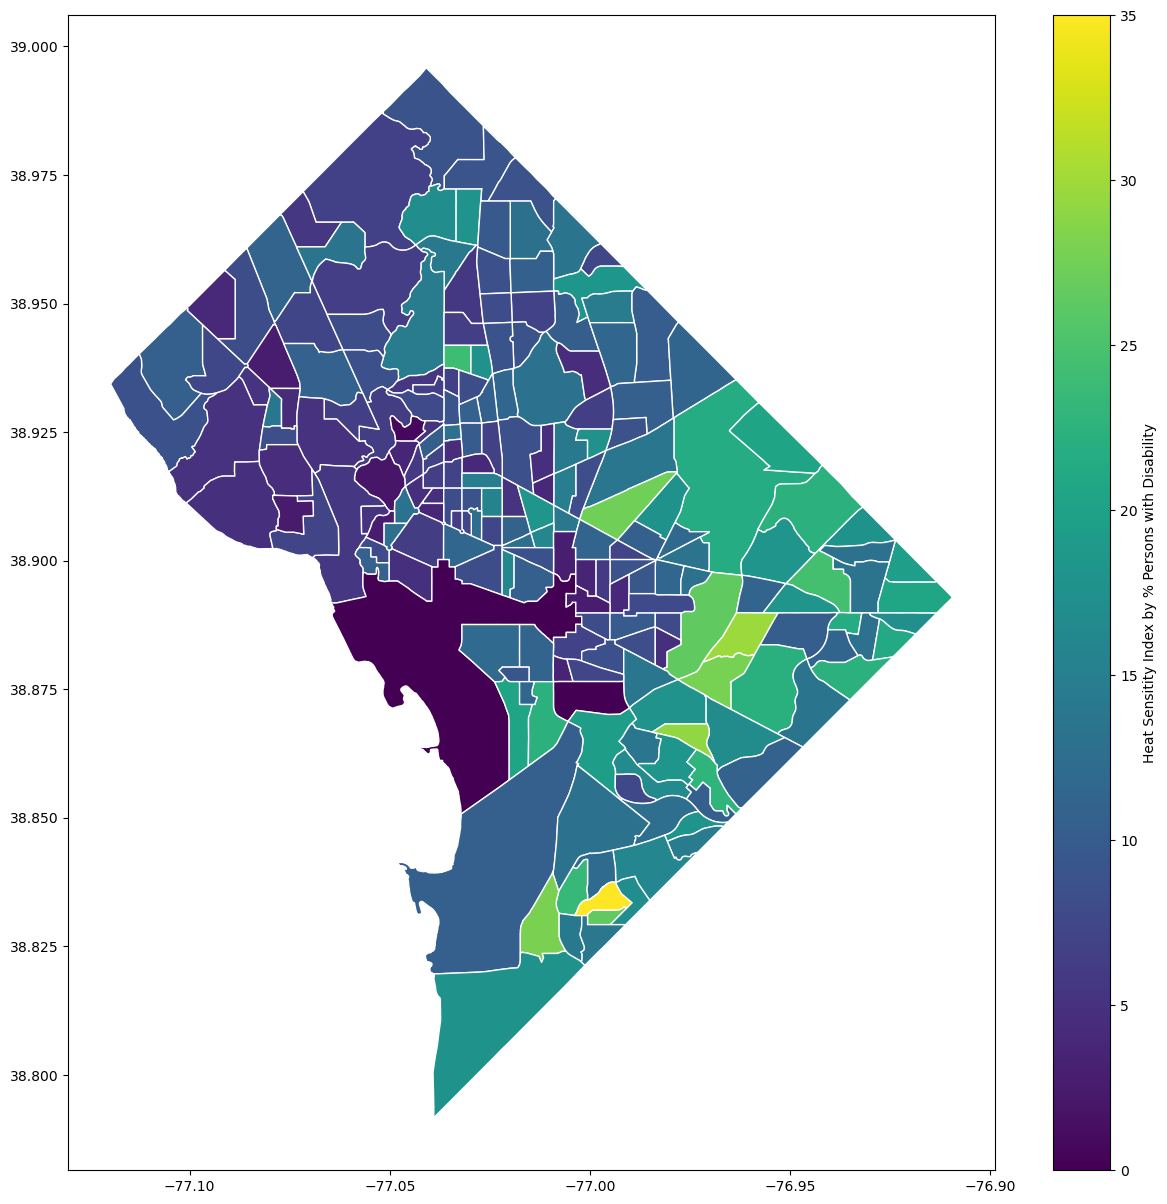

In [36]:
#plot heat sensitivity index by persons with disability


heat_sensitivity = gpd.read_file('raw_data/heat_sensitivity.json')

fig, ax = plt.subplots()
#census_tracts_df.plot(ax=ax, zorder=2, linewidth=1.5, alpha=.5, color='red', edgecolor='white')

heat_sensitivity.plot(ax=ax, 
                   column = 'P_DISABILITY', 
                      legend = True,
                  figsize = [25, 25],\
                  legend_kwds = {'label': "Heat Sensitity Index by % Persons with Disability"}, 
                  zorder=3, 
                  alpha=1, 
                  linewidth=1, 
                  edgecolor='white')
                      
          

<AxesSubplot: >

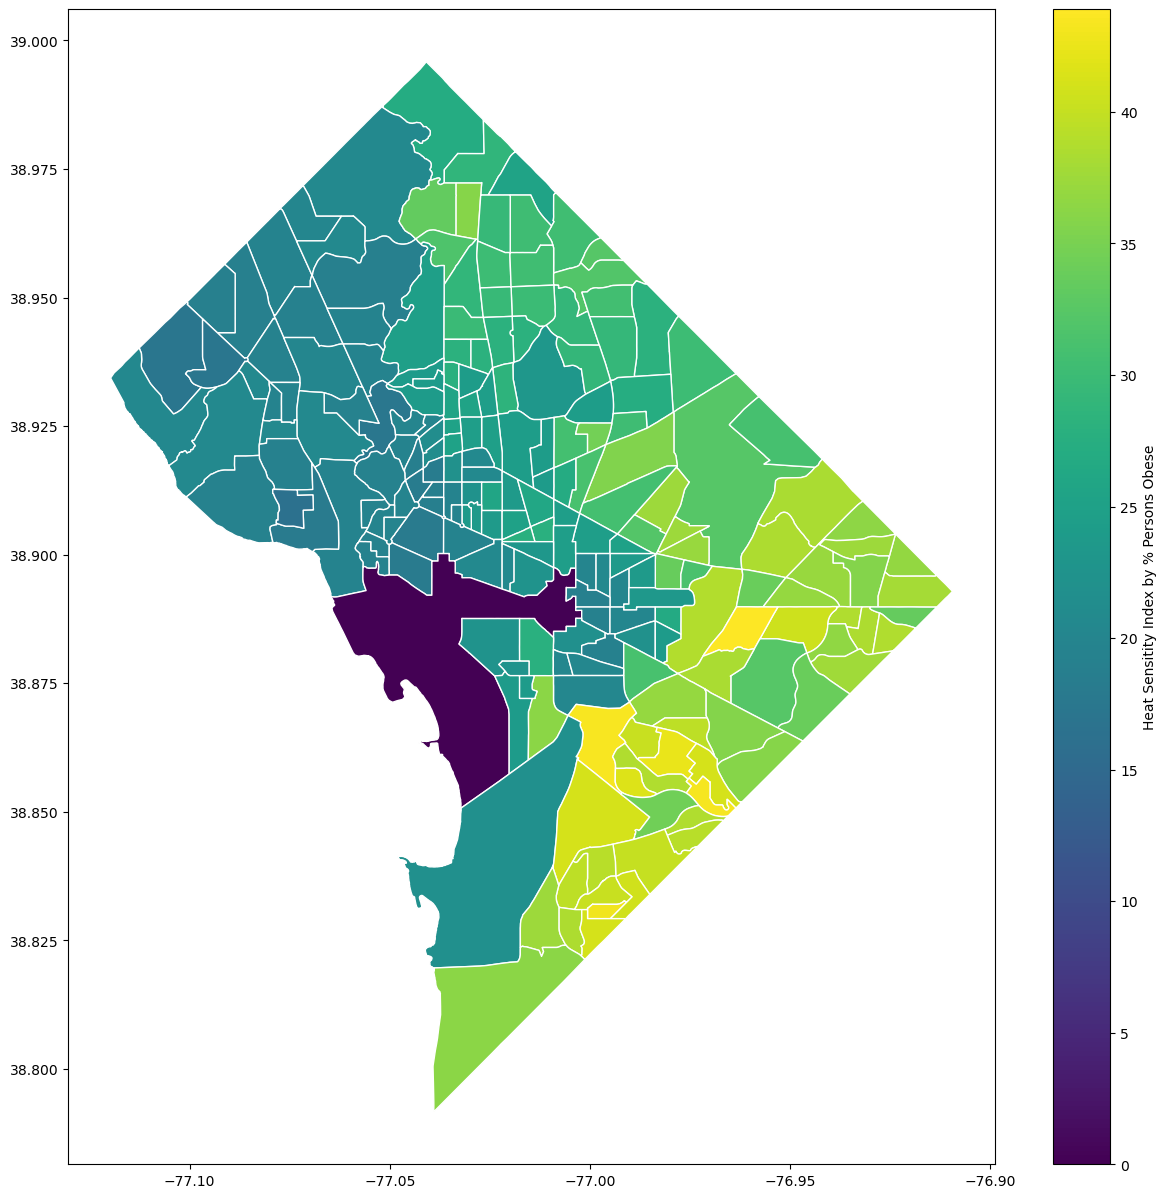

In [8]:
# plot heat sensitivity index by  percentage of persons with obesity


heat_sensitivity = gpd.read_file('raw_data/heat_sensitivity.json')

fig, ax = plt.subplots()
#census_tracts_df.plot(ax=ax, zorder=2, linewidth=1.5, alpha=.5, color='red', edgecolor='white')

heat_sensitivity.plot(ax=ax, 
                   column = 'OBESITY', 
                      legend = True,
                  figsize = [25, 25],\
                  legend_kwds = {'label': "Heat Sensitity Index by % Persons Obese"}, 
                  zorder=3, 
                  alpha=1, 
                  linewidth=1, 
                  edgecolor='white')
                      
          

<AxesSubplot: >

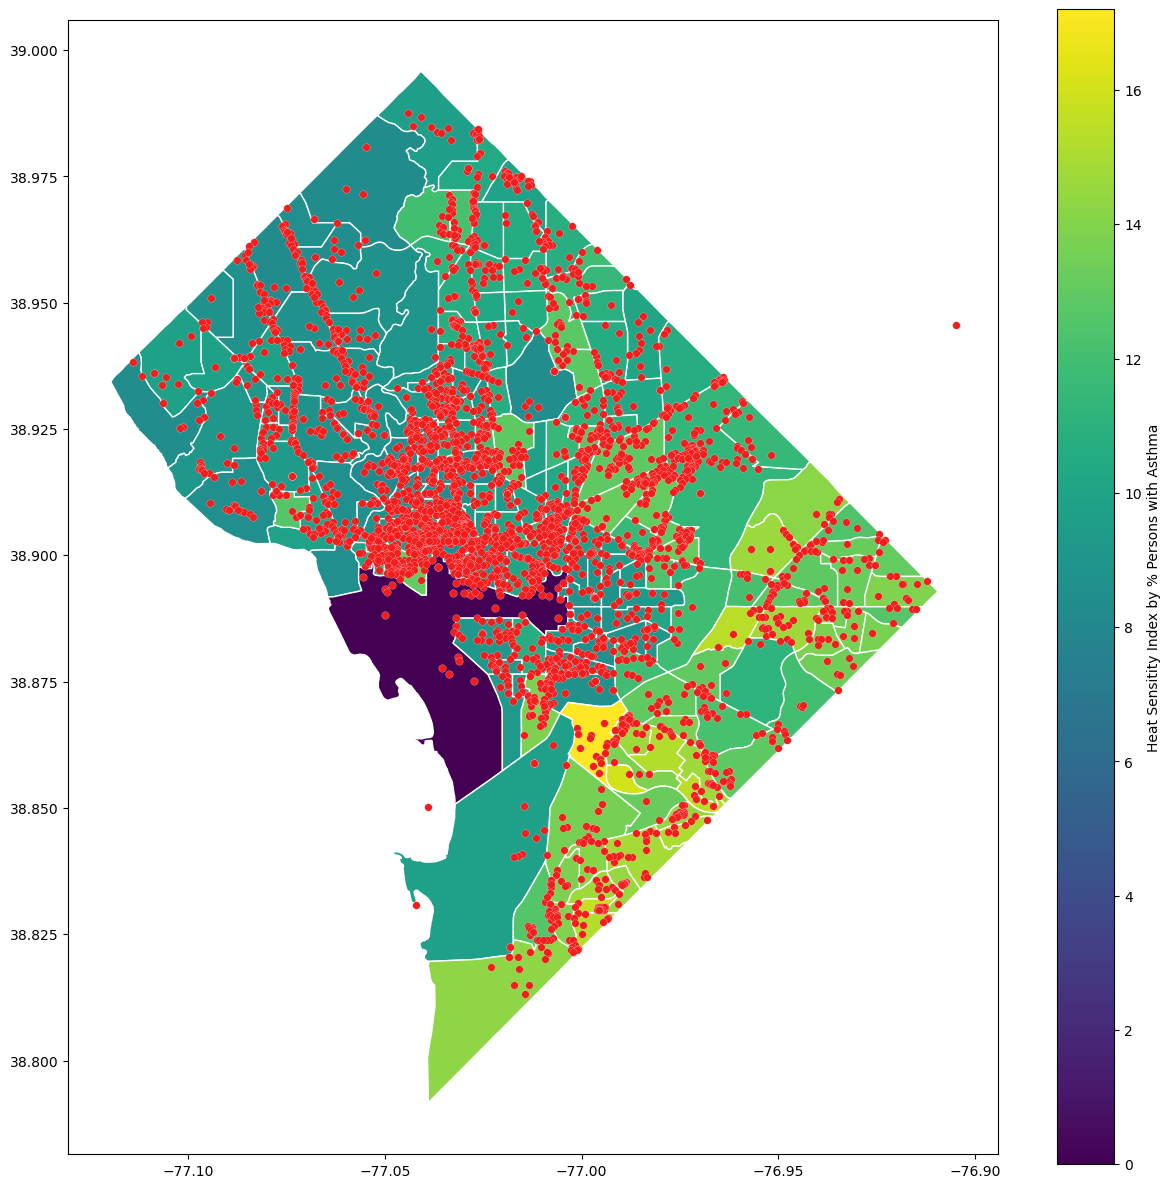

In [39]:
# plot heat sensitivity index by persons WITH asthma
# overlay underground tankss


heat_sensitivity = gpd.read_file('raw_data/heat_sensitivity.json')
asthma_df =gpd.read_file('raw_data/storage_tanks_all.geojson')

fig, ax = plt.subplots()


heat_sensitivity.plot(ax=ax, 
                   column = 'ASTHMA', 
                      legend = True,
                  figsize = [25, 25],\
                  legend_kwds = {'label': "Heat Sensitity Index by % Persons with Asthma"}, 
                  zorder=3, 
                  alpha=1, 
                  linewidth=1, 
                  edgecolor='white')
asthma_df.plot(ax=ax, color='#F21D1D', zorder=3, linewidth=.15, markersize=30, alpha=1, edgecolor='white')

                      
          

## Cells below map the economic data by census tract

<AxesSubplot: >

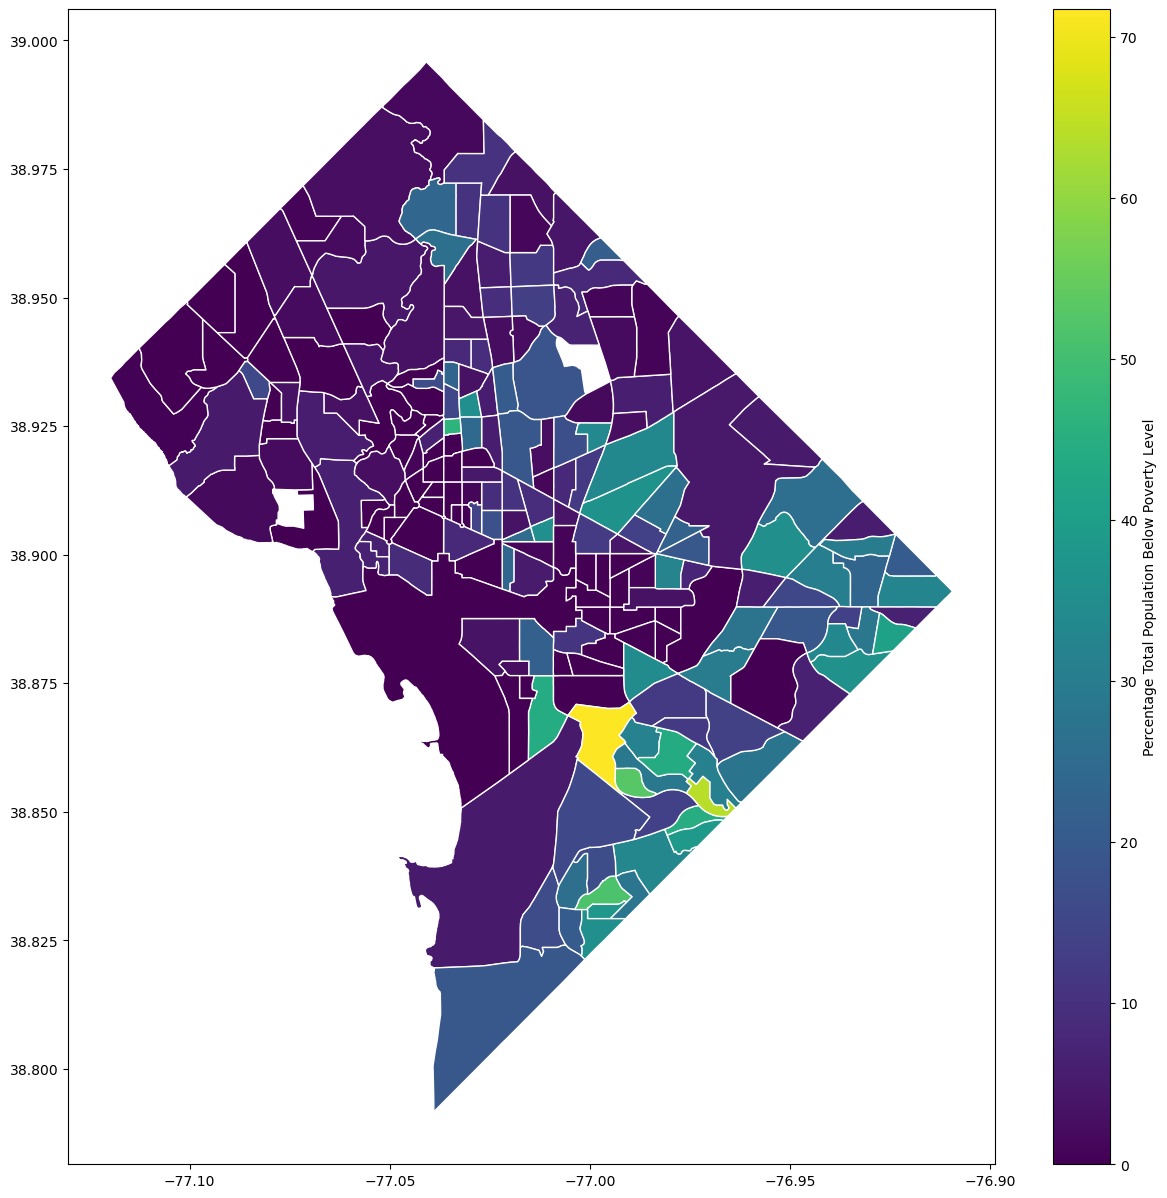

In [9]:
#plot distribution of total population below poverty level


heat_sensitivity = gpd.read_file('raw_data/joined_data.geojson')

fig, ax = plt.subplots()
#census_tracts_df.plot(ax=ax, zorder=2, linewidth=1.5, alpha=.5, color='red', edgecolor='white')

heat_sensitivity.plot(ax=ax, 
                   column = 'economics_bm_PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL:  All people:  People in families', 
                      legend = True,
                  figsize = [25, 25],\
                  legend_kwds = {'label': "Percentage Total Population Below Poverty Level"}, 
                  zorder=3, 
                  alpha=1, 
                  linewidth=1, 
                  edgecolor='white')
                      
          

<AxesSubplot: >

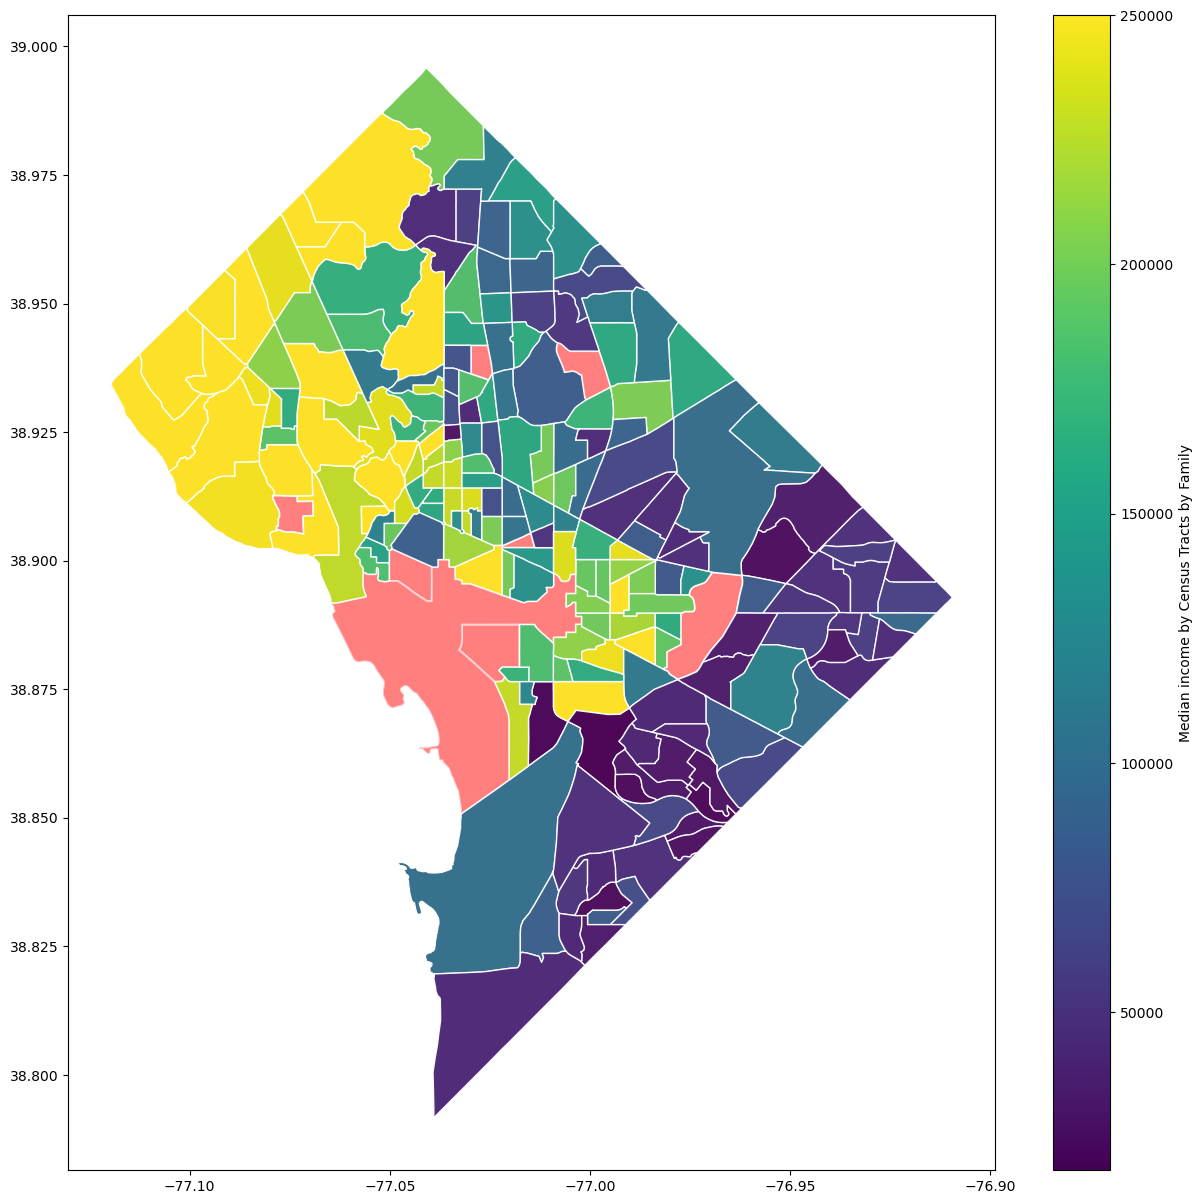

In [10]:
# choropleth map of census plots by MEDIAN income
# pink polygons denote missing data for the respective tracts
economics_raw = gpd.read_file('raw_data/joined_data.geojson')

fig, ax = plt.subplots()
census_tracts_df.plot(ax=ax, zorder=2, linewidth=1.5, alpha=.5, color='red', edgecolor='white')

economics_raw.plot(ax=ax, 
                   column = 'economics_bm_INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS): Families: Median family income (dollars)',
                  legend = True,
                  figsize = [25, 25],\
                  legend_kwds = {'label': "Median income by Census Tracts by Family"}, 
                  zorder=3, 
                  alpha=.95, 
                  linewidth=1, 
                  edgecolor='white')



In [11]:
# choropleth map of census plots by MEAN income
# pink polygons denote missing data for the respective tracts
economics_raw = gpd.read_file('raw_data/joined_data.geojson')
economics_raw.head()

,OBJECTID,TRACT,GEOID,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,...,economics_bm_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families,economics_bm_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Married couple families,economics_bm_Name,"economics_bm_PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Female householder, no spouse present","economics_bm_PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Female householder, no spouse present: With related children of the householder under 18 years",economics_bm_PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people,economics_bm_PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: People in families,economics_bm_x,economics_bm_y,geometry
0,1,002002,11001002002,4072,3647,1116,1751,27,84,0,...,2.3,1.0,"Census Tract 20.02, District of Columbia",7.4,14.2,6.0,3.3,None,None,"POLYGON ((-77.03642 38.94975, -77.03643 38.948..."
1,2,002101,11001002101,5687,5071,1037,2642,86,120,1,...,6.1,6.5,"Census Tract 21.01, District of Columbia",7.5,3.4,7.7,5.4,None,None,"POLYGON ((-77.02824 38.95813, -77.02824 38.958..."
2,3,002102,11001002102,5099,4599,901,2910,50,87,0,...,12.2,10.3,"Census Tract 21.02, District of Columbia",12.4,38.9,12.7,11.7,None,None,"POLYGON ((-77.01997 38.95819, -77.01997 38.958..."
3,4,002201,11001002201,3485,3138,973,1722,21,94,2,...,5.4,6.7,"Census Tract 22.01, District of Columbia",0.0,0.0,9.3,9.0,None,None,"POLYGON ((-77.02743 38.95188, -77.02740 38.951..."
4,5,002202,11001002202,3339,2957,619,1636,48,57,3,...,8.5,0.0,"Census Tract 22.02, District of Columbia",24.8,39.7,13.3,13.4,None,None,"POLYGON ((-77.01968 38.95209, -77.01963 38.951..."


<AxesSubplot: >

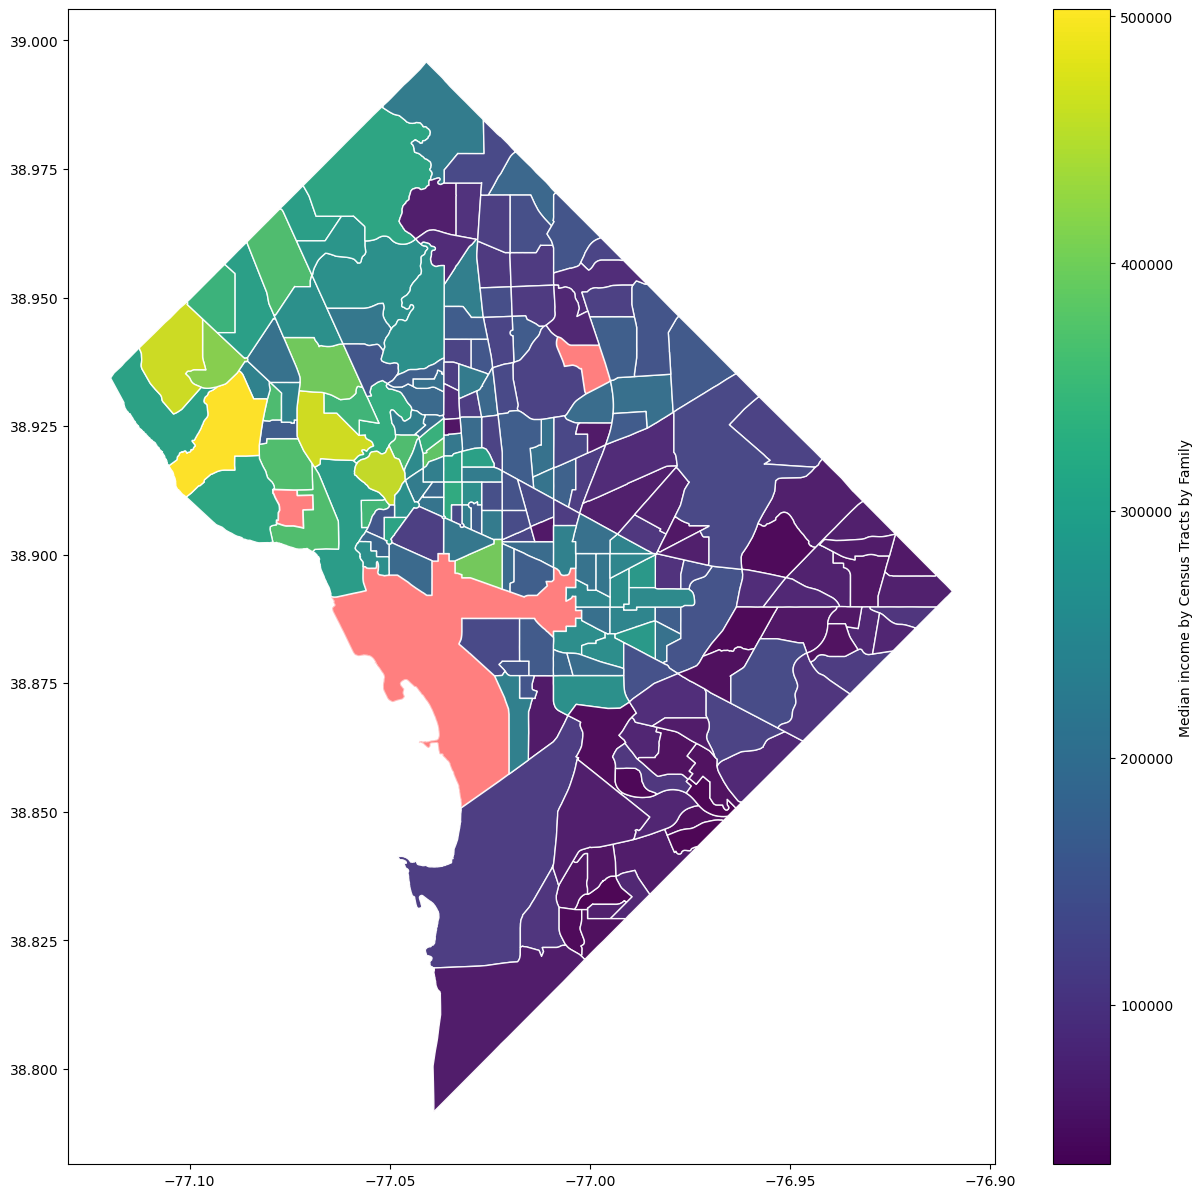

In [12]:
# choropleth map of census plots by MEAN income
# pink polygons denote missing data for the respective tracts
economics_raw = gpd.read_file('raw_data/joined_data.geojson')

fig, ax = plt.subplots()
census_tracts_df.plot(ax=ax, zorder=2, linewidth=1.5, alpha=.5, color='red', edgecolor='white')

economics_raw.plot(ax=ax, 
                   column = 'economics_bm_INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS): Families: Mean family income (dollars)',
                  legend = True,
                  figsize = [25, 25],\
                  legend_kwds = {'label': "Median income by Census Tracts by Family"}, 
                  zorder=3, 
                  alpha=.95, 
                  linewidth=1, 
                  edgecolor='white')



## Begin clean-up of economic data by removing irrelavent columns


In [13]:
economics_joined_raw = gpd.read_file('C:/Users/NEWMAPSPLUS2/brainstorm-final-project-698/notebooks/data/economics_cleaned.geojson')


economics_joined_raw.to_file('data/economics_cleaned.json')


In [14]:
econ_df = gpd.read_file('data/economics_cleaned.json')
econ_df.head()

,OBJECTID,TRACT,GEOID,ALAND,AWATER,STUSAB,civilian labor force > 16 years,Total Number of Households,Total Household Income < $10K,"Total Household Income $10K to $14,999",...,"Income and Benefits (2019 Inflation-adjusted): Families: $100K to $149,999","Income and Benefits (2019 Inflation-adjusted): Families: $150K to $199,999",Income and Benefits (2019 Inflation-adjusted): Families: $200K or more,Income and Benefits (2019 Inflation-adjusted): Families: Median family income (dollars),Income and Benefits (2019 Inflation-adjusted): Families: Mean family income (dollars),Income and Benefits (2019 Inflation-adjusted):Per capita income (dollars),Income and Benefits (2019 Inflation-adjusted):Nonfamily households (dollars),Income and Benefits (2019 Inflation-adjusted):Nonfamily households:Mean nonfamily income (dollars),Percentage With Income In Past 12 Months Is Below Poverty Level: All people,geometry
0,1,002002,11001002002,849376,0,DC,2844.0,1372.0,6.0,56.0,...,100.0,141.0,391.0,183250.0,237004.0,78106.0,498.0,168042.0,6.0,"POLYGON ((-77.03642 38.94975, -77.03643 38.948..."
1,2,002101,11001002101,600992,0,DC,3360.0,2143.0,39.0,33.0,...,111.0,98.0,218.0,95095.0,108739.0,39190.0,883.0,82678.0,7.7,"POLYGON ((-77.02824 38.95813, -77.02824 38.958..."
2,3,002102,11001002102,725975,0,DC,3245.0,2132.0,196.0,56.0,...,216.0,185.0,188.0,92813.0,111365.0,45622.0,826.0,103534.0,12.7,"POLYGON ((-77.01997 38.95819, -77.01997 38.958..."
3,4,002201,11001002201,415173,0,DC,2207.0,871.0,0.0,0.0,...,74.0,80.0,182.0,141146.0,144739.0,43310.0,296.0,132417.0,9.3,"POLYGON ((-77.02743 38.95188, -77.02740 38.951..."
4,5,002202,11001002202,698895,566,DC,1916.0,1152.0,25.0,19.0,...,37.0,47.0,158.0,61597.0,111717.0,37993.0,473.0,73302.0,13.3,"POLYGON ((-77.01968 38.95209, -77.01963 38.951..."


<AxesSubplot: >

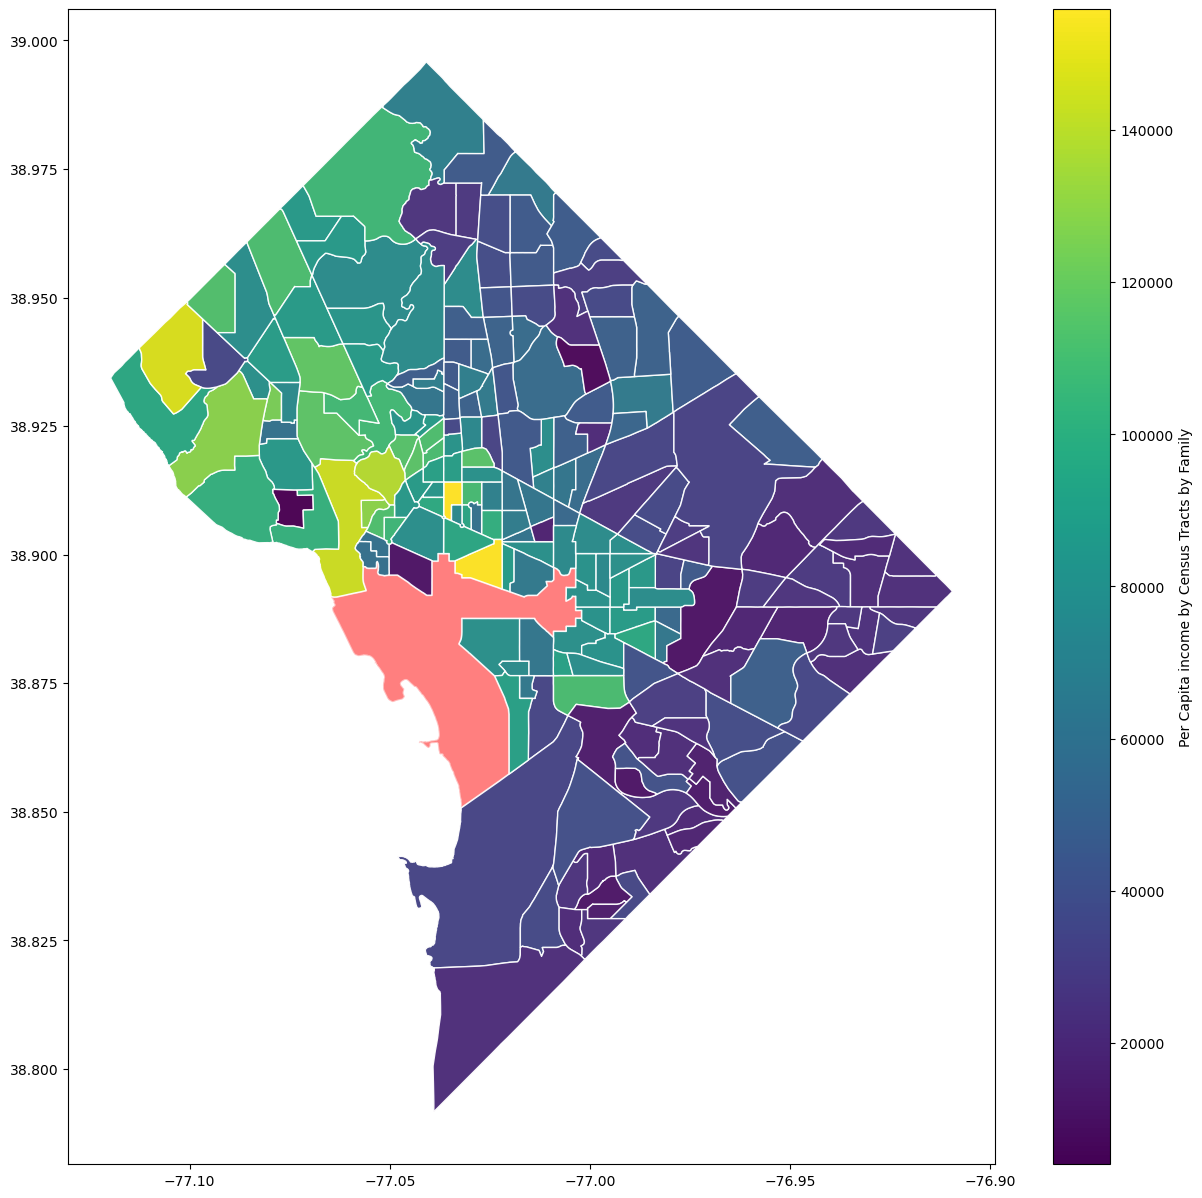

In [40]:
# choropleth map of census plots by per capita income
# pink polygons denote missing data for the respective tracts
economics_raw = gpd.read_file('data/economics_cleaned.json')

fig, ax = plt.subplots()
census_tracts_df.plot(ax=ax, zorder=2, linewidth=1.5, alpha=.5, color='red', edgecolor='white')

economics_raw.plot(ax=ax, 
                   column = 'Income and Benefits (2019 Inflation-adjusted):Per capita income (dollars)',
                  legend = True,
                  figsize = [25, 25],\
                  legend_kwds = {'label': "Per Capita income by Census Tracts by Family"}, 
                  zorder=3, 
                  alpha=.95, 
                  linewidth=1, 
                  edgecolor='white')

